# 1d3v GEMPIC electron hybrid code for R/L-waves with stationary ions

## 1. The model
The electron hybrid model for cold electrons with linearized fluid equations and hot kinetic electrons (Vlasov equation) reads

\begin{align}
&\frac{\partial\tilde{\mathbf{j}}_\mathrm{c}}{\partial t}=\epsilon_0\Omega_\mathrm{pe}^2\tilde{\mathbf{E}}+\tilde{\mathbf{j}}_\mathrm{c}\times\mathbf{\Omega}_\mathrm{ce},\\
&\frac{\partial f_\mathrm{h}}{\partial t}+\mathbf{v}\cdot\nabla f_\mathrm{h}+\frac{q_\mathrm{e}}{m_\mathrm{e}}(\mathbf{E}+\mathbf{v}\times\mathbf{B})\cdot\nabla_\mathbf{v}f_\mathrm{h}=0,\\
&\frac{\partial \tilde{\mathbf{B}}}{\partial t}=-\nabla\times\tilde{\mathbf{E}},\\
&\frac{1}{c^2}\frac{\partial \tilde{\mathbf{E}}}{\partial t}=\nabla\times\tilde{\mathbf{B}}-\mu_0\tilde{\mathbf{j}}_\mathrm{c}-\mu_0q_\mathrm{e}\int\mathbf{v}\tilde{f}_\mathrm{h}\,\mathrm{d}^3\mathbf{v},
\end{align}

where $\mathbf{\Omega}_\mathrm{ce}=q_\mathrm{e}\mathbf{B}_0/m_\mathrm{e}$ is the oriented electron cyclotron frequency corresponding to the background field $\mathbf{B}_0$ and $\Omega_{\mathrm{pe}}^2=n_{\mathrm{c}0}e^2/\epsilon_0m_\mathrm{e}$ the plasma frequency of the cold electrons. Here, only wave propagation parallel to the background magnetic field $\textbf{B}_0=B_0\textbf{e}_z$ is considered, i.e. $\textbf{k}=k\textbf{e}_z$. Therefore the nabla operator is simply $\nabla=\textbf{e}_z\partial_z$.

## 2. Dispersion relation
Linear theory of the above model leads to the following general dispersion relation for transverse electromagnetic waves and for an arbitrary equilibrium distribution function $f_\mathrm{h}^0(v_\parallel,v_\perp)=n_{\mathrm{h}0}F_\mathrm{h}^0(v_\parallel,v_\perp)$:


\begin{align}
D_{\text{R/L}}(k,\omega)=1-\frac{c^2k^2}{\omega^2}-\frac{\Omega_{\text{pe}}^2}{\omega(\omega\pm\Omega_{\text{ce}})}+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega}\int\frac{v_\perp}{2}\frac{\hat{G}F_\text{h}^0}{\omega\pm\Omega_{\text{ce}}-kv_\parallel}\text{d}^3\textbf{v}=0.
\end{align}

Here $\nu_\text{h}=n_{\text{h}0}/n_{\text{c}0}\ll1$ is the ratio between the hot and cold electron number densities, respectively, $\text{d}^3\textbf{v}=\text{d}v_\parallel\text{d}v_\bot v_\bot 2\pi$ and the differential operator

\begin{align}
\hat{G}=\frac{\partial}{\partial v_\bot}+\frac{k}{\omega}\left(v_\bot\frac{\partial}{\partial v_\parallel}-v_\parallel\frac{\partial}{\partial v_\bot}\right).
\end{align}

For an anisotropic Maxwellian 

\begin{align}
F^0(v_\parallel,v_\bot) = \frac{1}{(2\pi)^{3/2}w_\parallel w_\bot^2}\exp\left(-\frac{v_\parallel^2}{2w_\parallel^2}-\frac{v_\bot^2}{2w_\bot^2}\right)
\end{align}

the dispersion relation is given by

\begin{align}
D_{\text{R/L}}(k,\omega)=1-\frac{c^2k^2}{\omega^2}-\frac{\Omega_{\text{pe}}^2}{\omega(\omega\pm\Omega_{\text{ce}})}+\nu_\text{h}\frac{\Omega_{\text{pe}}^2}{\omega^2}\left[\frac{\omega}{k\sqrt{2}w_\parallel}Z(\xi^{\pm})-\left(1-\frac{w_\bot^2}{w_\parallel^2}\right)(1+\xi^{\pm} Z(\xi^{\pm}))\right]=0, 
\end{align}

where $\xi^\pm=(\omega\pm\Omega_\mathrm{ce})/k\sqrt{2}w_{\parallel}$ and $Z$ is the plasma dispersion function given by 

\begin{align}
Z(\xi)=\sqrt{\pi}\mathrm{e}^{-\xi^2}\left(i-\frac{2}{\sqrt{\pi}}\int_0^\xi\mathrm{e}^{t^2}\mathrm{d}t\right)=\sqrt{\pi}\mathrm{e}^{-\xi^2}(i-\mathrm{erfi}(\xi)).
\end{align}

# 3. Discretization
## 3. 1 Semi-discratization in space

Applying finite elements satisfying a 1D commuting diagram and using PIC for the kinetic equation leads to the following semi-discrete system:

\begin{align}
    &\mathbb{M}_0\frac{\mathrm{d}\textbf{e}_x}{\mathrm{d} t}=c^2\mathbb{G}^\top\mathbb{M}_1\textbf{b}_y-\mu_0c^2\mathbb{M}_0\textbf{y}_x-\mu_0c^2q\mathbb{Q}^0\mathbb{W}\textbf{V}_x, \label{semi1}\\
    &\mathbb{M}_0\frac{\mathrm{d}\textbf{e}_y}{\mathrm{d} t}=-c^2\mathbb{G}^\top\mathbb{M}_1\textbf{b}_x-\mu_0c^2\mathbb{M}_0\textbf{y}_y-\mu_0c^2q\mathbb{Q}^0\mathbb{W}\textbf{V}_y, \\
    &\frac{\mathrm{d}\textbf{b}_x}{\mathrm{d} t}=\mathbb{G}\textbf{e}_y, \\
    &\frac{\mathrm{d}\textbf{b}_y}{\mathrm{d} t}=-\mathbb{G}\textbf{e}_x, \\
    &\frac{\mathrm{d}\textbf{y}_x}{\mathrm{d} t}=\epsilon_0\Omega_\text{pe}^2\textbf{e}_x+\Omega_\text{ce}\textbf{y}_y, \\
    &\frac{\mathrm{d}\textbf{y}_y}{\mathrm{d} t}=\epsilon_0\Omega_\text{pe}^2\textbf{e}_y-\Omega_\text{ce}\textbf{y}_x, \label{semi6}\\
    &\frac{\mathrm{d}\textbf{Z}}{\mathrm{d} t}=\textbf{V}_z, \label{semi7}\\
    &\frac{\mathrm{d}\textbf{V}_x}{\mathrm{d} t}=\frac{q}{m}[(\mathbb{Q}^0)^\top\textbf{e}_x-\mathbb{B}_y\textbf{V}_z+B_0\textbf{V}_y], \label{semi8}\\
    &\frac{\mathrm{d}\textbf{V}_y}{\mathrm{d} t}=\frac{q}{m}[(\mathbb{Q}^0)^\top\textbf{e}_y+\mathbb{B}_x\textbf{V}_z-B_0\textbf{V}_x], \label{semi9}\\
    &\frac{\mathrm{d}\textbf{V}_z}{\mathrm{d} t}=\frac{q}{m}[\mathbb{B}_y\textbf{V}_x-\mathbb{B}_x\textbf{V}_y], \label{semi10},
\end{align}

where the matrices $\mathbb{W}\in\mathbb{R}^{N_\mathrm{p}\times N_\mathrm{p}}$, $\mathbb{Q}^0\in\mathbb{R}^{N_1\times N_\mathrm{p}}$, $\mathbb{Q}^1\in\mathbb{R}^{N_1\times N_\mathrm{p}}$ and $\mathbb{B}_{x/y}\in\mathbb{R}^{N_\mathrm{p}\times N_\mathrm{p}}$ are defined by

\begin{align}
&\mathbb{W}:=\mathrm{diag}(w_1,\ldots,w_{N_\mathrm{p}}),\\
&\mathbb{Q}^0=\mathbb{Q}^0(\mathbf{Z}):=(\varphi_{i}^0(z_k))_{i=0,\ldots,N_0-1;k=1\ldots,N_\mathrm{p}},\\
&\mathbb{Q}^1=\mathbb{Q}^1(\mathbf{Z}):=(\varphi_{i+1/2}^1(z_k))_{i=0,\ldots,N_1-1;k=1\ldots,N_\mathrm{p}},\\
&\mathbb{B}_{x/y}=\mathbb{B}_{x/y}(\mathbf{Z},\mathbf{b}_{x/y}):=\mathrm{diag}\left[(\mathbb{Q}^1)^\top(\mathbf{Z})\mathbf{b}_{x/y}\right].
\end{align}

The discrete gradient matrix $\mathbb{G}$ is given by

\begin{align}
\mathbb{G}:=\frac{2}{h}
\begin{pmatrix}
 -1 & 1  &  &  &  \\
  & -1 & 1 & &   \\
  &  & \ddots & \ddots &  \\
  &  &   & -1 & 1 \\
  1 &  &  &    & -1  
\end{pmatrix} \quad\in\mathbb{R}^{N_1\times N_0},
\end{align}

where $h$ is the element size. An important porperty of the semi-discrete system is that it can be written in a noncanonical Hamiltonian structure with a discrete Hamiltonian $H_h$ and a Poisson matrix $\mathbb{J}$:

\begin{align}
\frac{\mathrm{d}\mathbf{u}}{\mathrm{d}t}=\mathbb{J}(\mathbf{u})\nabla_\mathbf{u}H_h.
\end{align}

## 3. 2 Discretization in time (Hamiltonian splitting)

In Hamiltonian splitting, the idea is to keep the full Poisson matrix $\mathbb{J}$ in each step but to split the Hamiltonian. If one can solve each sub-step analytically this yields Poisson integrators, and the composition of Poisson integrators again yields a Poisson integrator. For example, we split $H_h$ as

\begin{align}
H_h = H_E + H_B + H_Y + H_x + H_y + H_z
\end{align},

where

\begin{align}
    &H_E=\frac{\epsilon_0}{2}(\textbf{e}_x^\top\mathbb{M}_0\textbf{e}_x+\textbf{e}_y^\top\mathbb{M}_0\textbf{e}_y), \\
    &H_B=\frac{1}{2\mu_0}(\textbf{b}_x^\top\mathbb{M}_1\textbf{b}_x+\textbf{b}_y^\top\mathbb{M}_1\textbf{b}_y), \\
    &H_Y=\frac{1}{2\epsilon_0\Omega_\mathrm{pe}^2}(\textbf{y}_x^\top\mathbb{M}_0\textbf{y}_x+\textbf{y}_y^\top\mathbb{M}_0\textbf{y}_y), \\
    &H_x = \frac{m}{2}\textbf{V}_x^\top\mathbb{W}\textbf{V}_x, \\
    &H_y = \frac{m}{2}\textbf{V}_y^\top\mathbb{W}\textbf{V}_y, \\
    &H_z = \frac{m}{2}\textbf{V}_z^\top\mathbb{W}\textbf{V}_z.
\end{align}

This leads to the following sub problems:

__Problem 1.__ For $t\in[0,\Delta t]$ and $\textbf{u}(t=0)=\textbf{u}^0$ we have
\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\mathbf{u})\nabla_{\textbf{u}} H_E(\textbf{u})=\mathbb{J}(\mathbf{u})\nabla_{\textbf{u}}\left[\frac{\epsilon_0}{2}(\textbf{e}_x^\top\mathbb{M}^0\textbf{e}_x+\textbf{e}_y^\top\mathbb{M}^0\textbf{e}_y)\right].
\end{align}
This can be solved analytically as
\begin{alignat}{3}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{e}_x(\Delta t) = \textbf{e}_x^0,\\
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{e}_y(\Delta t) = \textbf{e}_y^0,\\
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=\frac{1}{\epsilon_0}\mathbb{G}(\mathbb{M}^0)^{-1}\epsilon_0\mathbb{M}^0\textbf{e}_y &&\Longrightarrow\quad \textbf{b}_x(\Delta t) = \textbf{b}_x^0 + \Delta t\mathbb{G}\textbf{e}_y^0,\\
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=-\frac{1}{\epsilon_0}\mathbb{G}(\mathbb{M}^0)^{-1}\epsilon_0\mathbb{M}^0\textbf{e}_x &&\Longrightarrow\quad \textbf{b}_y(\Delta t) = \textbf{b}_y^0 - \Delta t\mathbb{G}\textbf{e}_x^0,\\
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=\Omega_\mathrm{pe}^2(\mathbb{M}^0)^{-1}\epsilon_0\mathbb{M}^0\textbf{e}_x &&\Longrightarrow\quad \textbf{y}_x(\Delta t) = \textbf{y}_x^0 + \Delta t\epsilon_0\Omega_\mathrm{pe}^2\textbf{e}_x^0,\\
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=\Omega_\mathrm{pe}^2(\mathbb{M}^0)^{-1}\epsilon_0\mathbb{M}^0\textbf{e}_y &&\Longrightarrow\quad \textbf{y}_y(\Delta t) = \textbf{y}_y^0 + \Delta t\epsilon_0\Omega_\mathrm{pe}^2\textbf{e}_y^0,\\
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{Z}(\Delta t) = \textbf{Z}^0,\\
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=\frac{q_\text{e}}{\epsilon_0m_\text{e}}(\mathbb{Q}^0)^\top(\mathbb{M}^0)^{-1}\epsilon_0\mathbb{M}^0\textbf{e}_x\quad &&\Longrightarrow\quad \textbf{V}_x(\Delta t) = \textbf{V}_x^0 + \Delta t\frac{q_\text{e}}{m_\text{e}}(\mathbb{Q}^0)^\top(\textbf{Z}^0)\textbf{e}_x^0,\\ 
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=\frac{q_\text{e}}{\epsilon_0m_\text{e}}(\mathbb{Q}^0)^\top(\mathbb{M}^0)^{-1}\epsilon_0\mathbb{M}^0\textbf{e}_y &&\Longrightarrow\quad \textbf{V}_y(\Delta t) = \textbf{V}_x^0 + \Delta t\frac{q_\text{e}}{m_\text{e}}(\mathbb{Q}^0)^\top(\textbf{Z}^0)\textbf{e}_y^0,\\ 
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{V}_z(\Delta t) = \textbf{V}_z^0.
\end{alignat}
The corresponding integrator is denoted by $\textbf{u}(\Delta t)=\Phi_{\Delta t}^E(\textbf{u}^0)$.

__Problem 2.__ For $t\in[0,\Delta t]$ and $\textbf{u}(t=0)=\textbf{u}^0$ we have
\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_B(\textbf{u})=\mathbb{J}(\mathbf{u})\nabla_{\textbf{u}}\left[\frac{1}{2\mu_0}(\textbf{b}_x^\top\mathbb{M}^1\textbf{b}_x+\textbf{b}_y^\top\mathbb{M}^1\textbf{b}_y)\right].
\end{align}
This can be solved analytically as
\begin{alignat}{3}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=\frac{1}{\epsilon_0}(\mathbb{M}^0)^{-1}\mathbb{G}^\top\frac{1}{\mu_0}\mathbb{M}^1\textbf{b}_y &&\Longrightarrow\quad \textbf{e}_x(\Delta t) = \textbf{e}_x^0 + \Delta tc^2(\mathbb{M}^0)^{-1}\mathbb{G}^\top\mathbb{M}^1\textbf{b}_y^0,\\
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\frac{1}{\epsilon_0}(\mathbb{M}^0)^{-1}\mathbb{G}^\top\frac{1}{\mu_0}\mathbb{M}^1\textbf{b}_x \quad &&\Longrightarrow\quad \textbf{e}_y(\Delta t) = \textbf{e}_y^0 - \Delta tc^2(\mathbb{M}^0)^{-1}\mathbb{G}^\top\mathbb{M}^1\textbf{b}_x^0,\\
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_x(\Delta t) = \textbf{b}_x^0,\\
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_y(\Delta t) = \textbf{b}_y^0,\\
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{y}_x(\Delta t) = \textbf{y}_x^0,\\
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{y}_y(\Delta t) = \textbf{y}_y^0,\\
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0\hspace{3.3cm} &&\Longrightarrow\quad \textbf{Z}(\Delta t) = \textbf{Z}^0,\\
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{V}_x(\Delta t) = \textbf{V}_x^0,\\
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{V}_y(\Delta t) = \textbf{V}_y^0,\\
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{V}_z(\Delta t) = \textbf{V}_z^0.
\end{alignat}
The corresponding integrator is denoted by $\textbf{u}(\Delta t)=\Phi_{\Delta t}^B(\textbf{u}^0)$.
    
    
    
__Problem 3.__ For $t\in[0,\Delta t]$ and $\textbf{u}(t=0)=\textbf{u}^0$, we have
\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_Y(\textbf{u})=\mathbb{J}(\mathbf{u})\nabla_{\textbf{u}}\left[\frac{1}{2\epsilon_0\Omega_\mathrm{pe}^2}(\textbf{y}_x^\top\mathbb{M}^0\textbf{y}_x+\textbf{y}_y^\top\mathbb{M}^0\textbf{y}_y)\right].
\end{align}
This can be solved analytically as
\begin{alignat}{3}
\begin{split}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=-\Omega_\mathrm{pe}^2(\mathbb{M}^0)^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}^0\textbf{y}_x \\
    &\Longrightarrow \textbf{e}_x(\Delta t)=\textbf{e}_x^0 - \frac{1}{\epsilon_0}\int_{0}^{\Delta t} y_x(t^\prime)\mathrm{d}t^\prime =\textbf{e}_x^0 - \frac{1}{\epsilon_0\Omega_\mathrm{ce}}[\textbf{y}_x^0\sin(\Omega_\textbf{ce}t)-\textbf{y}_y^0\cos(\Omega_\textbf{ce}t)+\textbf{y}_y^0],
\end{split}\\
\begin{split}
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\Omega_\mathrm{pe}^2(\mathbb{M}^0)^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}^0\textbf{y}_y \\
    &\Longrightarrow \textbf{e}_y(\Delta t)= \textbf{e}_y^0 - \frac{1}{\epsilon_0}\int_{0}^{\Delta t} y_y(t^\prime)\mathrm{d}t^\prime =\textbf{e}_y^0 - \frac{1}{\epsilon_0\Omega_\mathrm{ce}}[\textbf{y}_y^0\sin(\Omega_\textbf{ce}t)+\textbf{y}_x^0\cos(\Omega_\textbf{ce}t)-\textbf{y}_x^0],
\end{split}
\end{alignat}
\begin{alignat}{3}
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_x(\Delta t) = \textbf{b}_x^0,\\
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_y(\Delta t) = \textbf{b}_y^0,\\
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}(\mathbb{M}^0)^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}^0\textbf{y}_y &&\Longrightarrow\quad \textbf{y}_x(\Delta t) = \textbf{y}_x^0\cos(\Omega_\textbf{ce}\Delta t)+\textbf{y}_y^0\sin(\Omega_\textbf{ce}\Delta t),\\
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=-\epsilon_0\Omega_\mathrm{pe}^2\Omega_\mathrm{ce}(\mathbb{M}^0)^{-1}\frac{1}{\epsilon_0\Omega_\mathrm{pe}^2}\mathbb{M}^0\textbf{y}_x \quad &&\Longrightarrow\quad\textbf{y}_y(\Delta t) = \textbf{y}_y^0\cos(\Omega_\textbf{ce}\Delta t)-\textbf{y}_x^0\sin(\Omega_\textbf{ce}\Delta t),\\
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{Z}(\Delta t) = \textbf{Z}^0,\\
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad\textbf{V}_x(\Delta t) = \textbf{V}_x^0,\\
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{V}_y(\Delta t) = \textbf{V}_y^0,\\
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=0 &&\Longrightarrow\quad\textbf{V}_z(\Delta t) = \textbf{V}_z^0.
\end{alignat}
The corresponding integrator is denoted by $\textbf{u}(\Delta t)=\Phi_{\Delta t}^Y(\textbf{u}^0)$.




__Problem 4.__ For $t\in[0,\Delta t]$ and $\textbf{u}(t=0)=\textbf{u}^0$, we have
\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_x(\textbf{u})=\mathbb{J}(\mathbf{u})\nabla_{\textbf{u}}\left(\frac{m_\mathrm{e}}{2}\textbf{V}_x^\top\mathbb{W}\textbf{V}_x\right).
\end{align}
This can be solved analytically as
\begin{alignat}{3}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=-\frac{q_\text{e}}{\epsilon_0m_\text{e}}(\mathbb{M}^0)^{-1}\mathbb{Q}^0m_\text{e}\mathbb{W}\textbf{V}_x\quad &&\Longrightarrow\quad\textbf{e}_x(\Delta t) =\textbf{e}_y^0 - \Delta t\frac{q_\text{e}}{\epsilon_0}(\mathbb{M}^0)^{-1}\mathbb{Q}^0(\textbf{Z}^0)\mathbb{W}\textbf{V}_x^0,\\
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{e}_y(\Delta t) = \textbf{e}_y^0,\\
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_x(\Delta t) = \textbf{b}_x^0,\\
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_y(\Delta t) = \textbf{b}_y^0,\\
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{y}_x(\Delta t) = \textbf{y}_x^0,\\
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{y}_y(\Delta t) = \textbf{y}_y^0,\\
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{Z}(\Delta t) = \textbf{Z}^0,\\
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{V}_x(\Delta t) = \textbf{V}_x^0,\\
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=-\frac{\Omega_\mathrm{ce}}{m}\mathbb{W}^{-1}m_\text{e}\mathbb{W}\textbf{V}_x &&\Longrightarrow\quad \textbf{V}_y(\Delta t) = \textbf{V}_y^0-\Delta t\Omega_\text{ce}\textbf{V}_x^0,\\
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=\frac{q_\text{e}}{m_\text{e}^2}\mathbb{B}_y\mathbb{W}^{-1}m_\text{e}\mathbb{W}\textbf{V}_x \quad &&\Longrightarrow\quad \textbf{V}_z(\Delta t) = \textbf{V}_z^0+\Delta t\frac{q_\text{e}}{m_\text{e}}\mathbb{B}_y(\textbf{Z}^0,\textbf{b}_y^0)\textbf{V}_x^0.
\end{alignat}
The corresponding integrator is denoted by $\textbf{u}(\Delta t)=\Phi_{\Delta t}^y(\textbf{u}^0)$.



__Problem 5.__ For $t\in[0,\Delta t]$ and $\textbf{u}(t=0)=\textbf{u}^0$, we have
\begin{align}
\frac{\mathrm{d}\textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_y(\textbf{u})=\mathbb{J}(\mathbf{u})\nabla_{\textbf{u}}\left(\frac{m_\mathrm{e}}{2}\textbf{V}_y^\top\mathbb{W}\textbf{V}_y\right).
\end{align}
This can be solved analytically as
\begin{alignat}{3}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{e}_x(\Delta t) = \textbf{e}_x^0,\\
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=-\frac{q_\text{e}}{\epsilon_0m_\text{e}}(\mathbb{M}^0)^{-1}\mathbb{Q}^0m_\text{e}\mathbb{W}\textbf{V}_y\quad &&\Longrightarrow\quad \textbf{e}_y(\Delta t) = \textbf{e}_y^0 - \Delta t\frac{q_\text{e}}{\epsilon_0}(\mathbb{M}^0)^{-1}\mathbb{Q}^0(\textbf{Z}^0)\mathbb{W}\textbf{V}_y^0,\\
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_x(\Delta t) = \textbf{b}_x^0,\\
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_y(\Delta t) = \textbf{b}_y^0,\\
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{y}_x(\Delta t) = \textbf{y}_x^0,\\
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{y}_y(\Delta t) = \textbf{y}_y^0,\\
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{Z}(\Delta t) = \textbf{Z}^0,\\
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=\frac{\Omega_\mathrm{ce}}{m}\mathbb{W}^{-1}m_\text{e}\mathbb{W}\textbf{V}_y &&\Longrightarrow\quad \textbf{V}_x(\Delta t) = \textbf{V}_x^0+\Delta t\Omega_\mathrm{ce}\textbf{V}_y^0,\\
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{V}_y(\Delta t) = \textbf{V}_y^0,\\
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=-\frac{q_\text{e}}{m_\text{e}^2}\mathbb{B}_x\mathbb{W}^{-1}m_\text{e}\mathbb{W}\textbf{V}_y &&\Longrightarrow\quad \textbf{V}_z(\Delta t) = \textbf{V}_z^0-\Delta t\frac{q_\text{e}}{m_\text{e}}\mathbb{B}_x(\textbf{Z}^0,\textbf{b}_x^0)\textbf{V}_y^0.
\end{alignat}
The corresponding integrator is denoted by $\textbf{u}(\Delta t)=\Phi_{\Delta t}^y(\textbf{u}^0)$.





__Problem 6.__ For $t\in[0,\Delta t]$ and $\textbf{u}(t=0)=\textbf{u}^0$, we have
\begin{align}
\frac{\mathrm{d} \textbf{u}}{\mathrm{d}t}=\mathbb{J}(\textbf{u})\nabla_{\textbf{u}} H_z(\textbf{u})=\mathbb{J}(\mathbf{u})\nabla_{\textbf{u}}\left(\frac{m_\mathrm{e}}{2}\textbf{V}_z^\top\mathbb{W}\textbf{V}_z\right).
\end{align}
This can be solved analytically as
\begin{alignat}{3}
    &\frac{\mathrm{d} \textbf{e}_x}{\mathrm{d}t}=0\quad &&\Longrightarrow\quad \textbf{e}_x(\Delta t) = \textbf{e}_x^0,\\
    &\frac{\mathrm{d} \textbf{e}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{e}_y(\Delta t) = \textbf{e}_y^0,\\
    &\frac{\mathrm{d} \textbf{b}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_x(\Delta t) = \textbf{b}_x^0,\\
    &\frac{\mathrm{d} \textbf{b}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{b}_y(\Delta t) = \textbf{b}_y^0,\\
     &\frac{\mathrm{d} \textbf{y}_x}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{y}_x(\Delta t) = \textbf{y}_x^0,\\
     &\frac{\mathrm{d} \textbf{y}_y}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{y}_y(\Delta t) = \textbf{y}_y^0,\\
     &\frac{\mathrm{d} \textbf{Z}}{\mathrm{d}t}=\frac{1}{m}\mathbb{W}^{-1}m_\text{e}\mathbb{W}\textbf{V}_z &&\Longrightarrow\quad \textbf{Z}(\Delta t) = \textbf{Z}^0+\Delta t\textbf{V}_z^0,\\
     &\frac{\mathrm{d} \textbf{V}_x}{\mathrm{d}t}=-\frac{q_\text{e}}{m_\text{e}^2}\mathbb{B}_y\mathbb{W}^{-1}m_\text{e}\mathbb{W}\textbf{V}_z \quad &&\Longrightarrow\quad \textbf{V}_x(\Delta t) = \textbf{V}_x^0-\frac{q_\text{e}}{m_\text{e}}\int_{0}^{\Delta t}\mathbb{B}_y(\textbf{Z}(s),\textbf{b}_y^0)\mathrm{d}s\textbf{V}_z^0\label{eq_lineIntegral_1}\\
     &\frac{\mathrm{d} \textbf{V}_y}{\mathrm{d}t}=\frac{q_\text{e}}{m_\text{e}^2}\mathbb{B}_x\mathbb{W}^{-1}m_\text{e}\mathbb{W}\textbf{V}_z &&\Longrightarrow\quad \textbf{V}_y(\Delta t) = \textbf{V}_y^0+\frac{q_\text{e}}{m_\text{e}}\int_{0}^{\Delta t}\mathbb{B}_x(\textbf{Z}(s),\textbf{b}_x^0)\mathrm{d}s\textbf{V}_z^0\label{eq_lineIntegral_2}\\
     &\frac{\mathrm{d} \textbf{V}_z}{\mathrm{d}t}=0 &&\Longrightarrow\quad \textbf{V}_z(\Delta t) = \textbf{V}_z^0.
\end{alignat}
The corresponding integrator is denoted by $\textbf{u}(\Delta t)=\Phi_{\Delta t}^z(\textbf{u}^0)$. Note that the integrals can be computed exactly along each particle trajectories as the basis functions are piecewise polynomials.

# 1. The code

In [1]:
import psydac.core.interface as inter

import numpy as np
import scipy as sc

import utilitis_Bsplines as utils
import integrators_Bsplines as integrators

import matplotlib.pyplot as plt


# ... physical parameters
eps0 = 1.0                         # ... vacuum permittivity
mu0 = 1.0                          # ... vacuum permeability
c = 1.0                            # ... speed of light
qe = -1.0                          # ... electron charge
qi = 1.0                           # ... ion charge
me = 1.0                           # ... electron mass
B0z = 1.0                          # ... background magnetic field in z-direction
wce = qe*B0z/me                    # ... electron cyclotron frequency
wpe = 2*np.abs(wce)                # ... cold electron plasma frequency
nuh = 0.002                        # ... ratio of cold/hot electron densities (nh/nc)
nh = nuh*wpe**2                    # ... hot electron density
nc = wpe**2                        # ... cold electron density
ni = nc + nh                       # ... ion density
wpar = 0.1*c                       # ... parallel thermal velocity of energetic particles
wperp = 0.1*c                      # ... perpendicular thermal velocity of energetic particles
# ...




# ... initial conditions
k = 2                                 # ... wavenumber of initial wave field perturbations
amp = 1e-4                            # ... amplitude of initial wave field perturbations
eps = 0.1                             # ... amplitude of spatial pertubation of initial distribution function 


Bx0 = lambda z : amp*np.sin(k*z)      # ... initial Bx
By0 = lambda z : 0*z                  # ... initial By
Ex0 = lambda z : 0*z                  # ... initial Ex
Ey0 = lambda z : 0*z                  # ... initial Ey
jx0 = lambda z : 0*z                  # ... initial jcx
jy0 = lambda z : 0*z                  # ... initial jcy
jz0 = lambda z : 0*z                  # ... initial jcz
# ...




# ... numerical parameters
Lz = 2*np.pi/k                     # ... length of z-domain
Nel = 32                           # ... number of elements z-direction
T = 300                            # ... simulation time
dt = 0.05                          # ... time step
p = 3                              # ... degree of Lagrange interpolation basis (V0)
Np = np.int(5e4)                   # ... number of markers
control = 0                        # ... switch on (1) or off control variate (0)
time_integr = 0                    # ... do time integration (1 : yes, 0: no)
scheme = 2                         # ... time integration scheme (1 : Lie-Trotter, 2 : Strang)
# ...



# ... element boundaries, size of an element and number of basis functions in V0 
el_b = np.linspace(0, Lz, Nel + 1)
dz = Lz/Nel

Nbase = Nel + p
# ...



# ... some diagnostic values
Eh_eq = Lz*nh*me/2*(wpar**2 + 2*wperp**2)      # ... equilibrium energetic electron energy

en_B = np.array([])                            # ... magnetic energy
en_E = np.array([])                            # ... electric energy
en_C = np.array([])                            # ... cold plasma energy
en_H = np.array([])                            # ... energetic particle energy  
en_tot = np.array([])                          # ... total energy
# ...




# ... initial energetic electron distribution function (perturbed anisotropic Maxwellian)
fh0 = lambda z, vx, vy, vz, eps : (1 + eps*np.cos(k*z))*nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
# ...


# ... Maxwellian for control variate
maxwell = lambda vx, vy, vz : nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))
# ...


# ... sampling distribution for initial markers
g_sampling = lambda vx, vy, vz : 1/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))*1/Lz
# ...




# ... create spline functions in V0 and V1, compute global mass matrices M0 and M1 and compute inverse of M0
Tz = inter.make_periodic_knots(p, Nbase)*Lz
t = Tz[1:-1]

mass0 = utils.mass_matrix_V0_1d(p, Nbase, Tz, True)
mass1 = utils.mass_matrix_V1_1d(p, Nbase, Tz, True)

mass0_inv = np.linalg.inv(mass0)
# ...

# ... normalization of splines in V0 and V1
norm_0 = utils.normalization_V0_1d(p, Nbase, Tz)
norm_0[:p] += norm_0[-p:]
norm_0 = norm_0[:norm_0.size - p]

norm_1 = utils.normalization_V1_1d(p, Nbase, Tz)
norm_1[:(p - 1)] += norm_1[-(p - 1):]
norm_1 = norm_1[:norm_1.size - (p - 1)]
# ...


# ... compute initial finite element coefficients (histopolation for B and interpolation for E and jc)
bx = utils.PI_1_1d(Bx0, p, Nbase, Tz, True)
by = utils.PI_1_1d(By0, p, Nbase, Tz, True)
ex = utils.PI_0_1d(Ex0, p, Nbase, Tz, True)
ey = utils.PI_0_1d(Ey0, p, Nbase, Tz, True)
yx = utils.PI_0_1d(jx0, p, Nbase, Tz, True)
yy = utils.PI_0_1d(jy0, p, Nbase, Tz, True)
# ...


# ... compute initial energies
en_B = np.append(en_B, 1/(2*mu0)*(np.dot(bx, np.dot(mass1, bx)) + np.dot(by, np.dot(mass1, by))))
en_E = np.append(en_E, eps0/2*(np.dot(ex, np.dot(mass0, ex)) + np.dot(ey, np.dot(mass0, ey))))
en_C = np.append(en_C, 1/(2*eps0*wpe**2)*(np.dot(yx, np.dot(mass0, yx)) + np.dot(yy, np.dot(mass0, yy))))
bx_save = np.append(np.copy(bx), bx[0])
# ...



# ... assemble discrete gradient matrix G
G = utils.GRAD_1d(p, Nbase, True)
# ...



# ... create particles (z, vx, vy, vz, wk) and sample positions and velocities according to sampling distribution with a Sobol sequence
particles = np.zeros((5, Np))

particles[0] = np.random.rand(Np)*Lz
particles[1] = np.random.randn(Np)*wperp
particles[2] = np.random.randn(Np)*wperp
particles[3] = np.random.randn(Np)*wpar
# ...



# ... compute parameters for control variate and compute initial weights
g0 = g_sampling(particles[1], particles[2], particles[3])
w0 = fh0(particles[0], particles[1], particles[2], particles[3], eps)/g_sampling(particles[1], particles[2], particles[3])
particles[4] = 1/Np*(w0 - control*maxwell(particles[1], particles[2], particles[3])/g0)
# ...



# ... assemble initial matrices Q0, Q1, Bx, By and W and compute initial energetic electron energy
part_num = np.arange(Np)

Q0 = inter.collocation_matrix(p, Nbase, Tz, particles[0])
Q0[:, :p] += Q0[:, -p:]
Q0 = sc.sparse.csr_matrix(Q0[:, :Q0.shape[1] - p]).transpose()

Q1 = inter.collocation_matrix(p - 1, Nbase - 1, t, particles[0])/dz
Q1[:, :(p - 1)] += Q1[:, -(p - 1):]
Q1 = sc.sparse.csr_matrix(Q1[:, :Q1.shape[1] - (p - 1)]).transpose()

Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))

W = sc.sparse.csr_matrix((particles[4], (part_num, part_num)), shape = (Np, Np))
en_H = np.append(en_H, me/2*(np.dot(particles[1], W.dot(particles[1])) + np.dot(particles[2], W.dot(particles[2])) + np.dot(particles[3], W.dot(particles[3]))) + control*Eh_eq)                         

en_tot = np.append(en_tot, en_B + en_E + en_C + en_H)
# ...



# ... solve Gauss law to get initial ez (in V0)
RHS = norm_1*(qi*ni/eps0 + qe*nc/eps0) + qe/eps0*Q1.dot(particles[4])
LHS = np.dot(mass1, G)

# fix the constant by setting the average to zero
LHS[-1] = norm_0/Lz          
RHS[-1] = 0.0

ez = np.linalg.solve(LHS, RHS)
# ...




# ... start time integration
if time_integr == 1:
    Nt = np.int(T/dt)
    tn = np.linspace(0, T, Nt + 1)
    counter = 0
    print('number of time steps : ' + str(Nt))

    if scheme == 1:
        while True:

            try:

                if counter*dt >= T:
                    break

                # ... Lie-Trotter-splitting

                # ... HE-integrator
                bx, by, yx, yy, particles[1], particles[2] = integrators.integrator_HE(ex, ey, bx, by, yx, yy, particles[1], particles[2], G, Q0, eps0, wpe, qe, me, dt)
                # ...


                # ... bx and by have changed: assemble matrices Bx and By  
                Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
                By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
                # ...


                # ... HB-integrator
                ex, ey = integrators.integrator_HB(ex, ey, bx, by, mass0_inv, G, mass1, c, dt)
                # ...


                # ... HY-integrator
                ex, ey, yx, yy = integrators.integrator_HY(ex, ey, yx, yy, eps0, wce, dt)
                # ...


                # ... Hx-integrator
                W = sc.sparse.csr_matrix((1/Np*(w0 - control*maxwell(particles[1], particles[2], particles[3])/g0), (part_num, part_num)), shape = (Np, Np))

                ex, particles[2], particles[3] = integrators.integrator_Hx(ex, particles[1], particles[2], particles[3], Q0, By, W, mass0_inv, eps0, qe, me, wce, dt)
                # ...


                # ... Hy-integrator
                W = sc.sparse.csr_matrix((1/Np*(w0 - control*maxwell(particles[1], particles[2], particles[3])/g0), (part_num, part_num)), shape = (Np, Np))

                ey, particles[1], particles[3] = integrators.integrator_Hy(ey, particles[1], particles[2], particles[3], Q0, Bx, W, mass0_inv, eps0, qe, me, wce, dt) 
                # ...


                # ... Hz-integrator
                particles[0], particles[1], particles[2] = integrators.integrator_Hz(p, bx, by, particles[0], particles[1], particles[2], particles[3], el_b, Lz, qe, me, dt, t)
                # ...


                # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
                Q0 = inter.collocation_matrix(p, Nbase, Tz, particles[0])
                Q0[:, :p] += Q0[:, -p:]
                Q0 = sc.sparse.csr_matrix(Q0[:, :Q0.shape[1] - p]).transpose()

                Q1 = inter.collocation_matrix(p - 1, Nbase - 1, t, particles[0])/dz
                Q1[:, :(p - 1)] += Q1[:, -(p - 1):]
                Q1 = sc.sparse.csr_matrix(Q1[:, :Q1.shape[1] - (p - 1)]).transpose()

                Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
                By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
                # ...


                # ... compute energies and do other diagnostics
                W = sc.sparse.csr_matrix((1/Np*(w0 - control*maxwell(particles[1], particles[2], particles[3])/g0), (part_num, part_num)), shape = (Np, Np))

                en_B = np.append(en_B, 1/(2*mu0)*(np.dot(bx, np.dot(mass1, bx)) + np.dot(by, np.dot(mass1, by))))
                en_E = np.append(en_E, eps0/2*(np.dot(ex, np.dot(mass0, ex)) + np.dot(ey, np.dot(mass0, ey))))
                en_C = np.append(en_C, 1/(2*eps0*wpe**2)*(np.dot(yx, np.dot(mass0, yx)) + np.dot(yy, np.dot(mass0, yy))))
                en_H = np.append(en_H, me/2*(np.dot(particles[1], W.dot(particles[1])) + np.dot(particles[2], W.dot(particles[2])) + np.dot(particles[3], W.dot(particles[3]))) + control*Eh_eq)
                en_tot = np.append(en_tot, en_B[-1] + en_E[-1] + en_C[-1] + en_H[-1])
                
                bx_save = np.vstack((bx_save, np.append(np.copy(bx), bx[0])))
                # ...


                counter += 1

                if counter%5 == 0:
                    print('time steps finished: ' + str(counter), 'eB = ' + str(en_B[-1]), 'error_energy = ' + str(np.abs(en_tot[-1] - en_tot[0])/(en_tot[0])))

            except KeyboardInterrupt:
                print('Pausing...  (Hit ENTER to continue, type quit to exit.)')
                try:
                    response = input()
                    if response == 'quit':
                        break
                    print('Resuming...')
                except KeyboardInterrupt:
                    print('Resuming...')
                    continue
                    
    if scheme == 2:
        while True:
    
            try:

                if counter*dt >= T:
                    break

                # ... Strang-splitting


                # ... Hz-integrator
                particles[0], particles[1], particles[2] = integrators.integrator_Hz(p, bx, by, particles[0], particles[1], particles[2], particles[3], el_b, Lz, qe, me, dt/2, t)
                # ...


                # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
                Q0 = inter.collocation_matrix(p, Nbase, Tz, particles[0])
                Q0[:, :p] += Q0[:, -p:]
                Q0 = sc.sparse.csr_matrix(Q0[:, :Q0.shape[1] - p]).transpose()

                Q1 = inter.collocation_matrix(p - 1, Nbase - 1, t, particles[0])/dz
                Q1[:, :(p - 1)] += Q1[:, -(p - 1):]
                Q1 = sc.sparse.csr_matrix(Q1[:, :Q1.shape[1] - (p - 1)]).transpose()

                Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
                By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
                # ...


                # ... Hy-integrator
                W = sc.sparse.csr_matrix((1/Np*(w0 - control*maxwell(particles[1], particles[2], particles[3])/g0), (part_num, part_num)), shape = (Np, Np))

                ey, particles[1], particles[3] = integrators.integrator_Hy(ey, particles[1], particles[2], particles[3], Q0, Bx, W, mass0_inv, eps0, qe, me, wce, dt/2) 
                # ...


                # ... Hx-integrator
                W = sc.sparse.csr_matrix((1/Np*(w0 - control*maxwell(particles[1], particles[2], particles[3])/g0), (part_num, part_num)), shape = (Np, Np))

                ex, particles[2], particles[3] = integrators.integrator_Hx(ex, particles[1], particles[2], particles[3], Q0, By, W, mass0_inv, eps0, qe, me, wce, dt/2)
                # ...


                # ... HY-integrator
                ex, ey, yx, yy = integrators.integrator_HY(ex, ey, yx, yy, eps0, wce, dt/2)
                # ...


                # ... HB-integrator
                ex, ey = integrators.integrator_HB(ex, ey, bx, by, mass0_inv, G, mass1, c, dt/2)
                # ...


                # ... HE-integrator
                bx, by, yx, yy, particles[1], particles[2] = integrators.integrator_HE(ex, ey, bx, by, yx, yy, particles[1], particles[2], G, Q0, eps0, wpe, qe, me, dt/2)
                # ...


                # ... bx and by have changed: assemble matrices Bx and By  
                Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
                By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
                # ...


                # ... HE-integrator
                bx, by, yx, yy, particles[1], particles[2] = integrators.integrator_HE(ex, ey, bx, by, yx, yy, particles[1], particles[2], G, Q0, eps0, wpe, qe, me, dt/2)
                # ...


                # ... bx and by have changed: assemble matrices Bx and By  
                Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
                By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
                # ...


                # ... HB-integrator
                ex, ey = integrators.integrator_HB(ex, ey, bx, by, mass0_inv, G, mass1, c, dt/2)
                # ...


                # ... HY-integrator
                ex, ey, yx, yy = integrators.integrator_HY(ex, ey, yx, yy, eps0, wce, dt/2)
                # ...


                # ... Hx-integrator
                W = sc.sparse.csr_matrix((1/Np*(w0 - control*maxwell(particles[1], particles[2], particles[3])/g0), (part_num, part_num)), shape = (Np, Np))

                ex, particles[2], particles[3] = integrators.integrator_Hx(ex, particles[1], particles[2], particles[3], Q0, By, W, mass0_inv, eps0, qe, me, wce, dt/2)
                # ...


                # ... Hy-integrator
                W = sc.sparse.csr_matrix((1/Np*(w0 - control*maxwell(particles[1], particles[2], particles[3])/g0), (part_num, part_num)), shape = (Np, Np))

                ey, particles[1], particles[3] = integrators.integrator_Hy(ey, particles[1], particles[2], particles[3], Q0, Bx, W, mass0_inv, eps0, qe, me, wce, dt/2) 
                # ...


                # ... Hz-integrator
                particles[0], particles[1], particles[2] = integrators.integrator_Hz(p, bx, by, particles[0], particles[1], particles[2], particles[3], el_b, Lz, qe, me, dt/2, t)
                # ...


                # ... positions have changed: assemble matrices Q0, Q1, Bx and By and weights W
                Q0 = inter.collocation_matrix(p, Nbase, Tz, particles[0])
                Q0[:, :p] += Q0[:, -p:]
                Q0 = sc.sparse.csr_matrix(Q0[:, :Q0.shape[1] - p]).transpose()

                Q1 = inter.collocation_matrix(p - 1, Nbase - 1, t, particles[0])/dz
                Q1[:, :(p - 1)] += Q1[:, -(p - 1):]
                Q1 = sc.sparse.csr_matrix(Q1[:, :Q1.shape[1] - (p - 1)]).transpose()

                Bx = sc.sparse.csr_matrix((Q1.transpose().dot(bx), (part_num, part_num)), shape = (Np, Np))
                By = sc.sparse.csr_matrix((Q1.transpose().dot(by), (part_num, part_num)), shape = (Np, Np))
                # ...



                # ... compute energies and do other diagnostics
                W = sc.sparse.csr_matrix((1/Np*(w0 - control*maxwell(particles[1], particles[2], particles[3])/g0), (part_num, part_num)), shape = (Np, Np))

                en_B = np.append(en_B, 1/(2*mu0)*(np.dot(bx, np.dot(mass1, bx)) + np.dot(by, np.dot(mass1, by))))
                en_E = np.append(en_E, eps0/2*(np.dot(ex, np.dot(mass0, ex)) + np.dot(ey, np.dot(mass0, ey))))
                en_C = np.append(en_C, 1/(2*eps0*wpe**2)*(np.dot(yx, np.dot(mass0, yx)) + np.dot(yy, np.dot(mass0, yy))))
                en_H = np.append(en_H, me/2*(np.dot(particles[1], W.dot(particles[1])) + np.dot(particles[2], W.dot(particles[2])) + np.dot(particles[3], W.dot(particles[3]))) + control*Eh_eq)
                en_tot = np.append(en_tot, en_B[-1] + en_E[-1] + en_C[-1] + en_H[-1])
                
                bx_save = np.vstack((bx_save, np.append(np.copy(bx), bx[0])))
                # ...


                counter += 1

                if counter%5 == 0:
                    print('time steps finished: ' + str(counter), 'eB = ' + str(en_B[-1]), 'error_energy = ' + str(np.abs(en_tot[-1] - en_tot[0])/(en_tot[0])))

            except KeyboardInterrupt:
                print('Pausing...  (Hit ENTER to continue, type quit to exit.)')
                try:
                    response = input()
                    if response == 'quit':
                        break
                    print('Resuming...')
                except KeyboardInterrupt:
                    print('Resuming...')
                    continue

In [4]:
en_B

array([7.85394892e-09])

# 2. Save results

In [52]:
save = 2                  # ... save results (1 : energies only, 2 : energies + bx coefficients, 3 : final particles)
filename = 'data_wpe=2_wpar=0.1_wperp_0.1_nuh=0.002_L=80_Nel=512_T=300_dt=0.05_p=3_Np=5e4_CVoff_Strang_GEMPIC.txt'


if save == 1: 
    data = np.vstack((en_B, en_E, en_C, en_H))
    np.savetxt(filename, np.transpose(data), fmt = '%1.10e')
    
elif save == 2:
    data = np.append(bx_save, np.reshape(en_B, (Nt + 1, 1)), axis = 1)
    data = np.append(data, np.reshape(en_E, (Nt + 1, 1)), axis = 1)
    data = np.append(data, np.reshape(en_C, (Nt + 1, 1)), axis = 1)
    data = np.append(data, np.reshape(en_H, (Nt + 1, 1)), axis = 1)
    np.savetxt(filename, data, fmt = '%1.10e')
    
elif save == 3:
    np.savetxt(filename, particles, fmt = '%1.10e')

# 3. Show some results

## 3. 1 Evolution of magnetic field energy

In [39]:
data = np.loadtxt('data_wpe=2_wpar=0.2_wperp_0.53_nuh=0.06_L=pi_Nel=32_T=200_dt=0.0125_p=3_Np=1e5_CVoff_Lie_GEMPIC.txt')

In [40]:
en_B = data[:, 0]
en_E = data[:, 1]
en_C = data[:, 2]
en_H = data[:, 3]
en_tot = en_B + en_E + en_C + en_H

wpe = 2.
wpar = 0.2
wperp = 0.53
nuh = 0.06
Lz = np.pi
Nel = 32
T = 200.
dt = 0.0125
p = 3
Np = int(1e5)
k = 2.

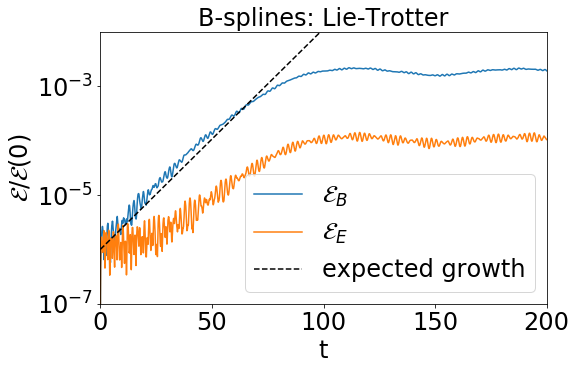

In [35]:
f1 = plt.figure()
f1.set_figheight(5)
f1.set_figwidth(8)

fontsize = 24
#plt.rc('text', usetex = False)
#plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

Nt = len(en_B) - 1
tn = np.linspace(0, Nt*dt, Nt + 1)

plt.semilogy(tn, en_B/en_tot[0], label = '$\mathcal{E}_B$')
plt.semilogy(tn, en_E/en_tot[0], label = '$\mathcal{E}_E$')
plt.ylim((1e-7, 1e-2))
plt.xlim((0, 200))

omega = utils.solveDispersionHybrid(k, +1, c, wce, wpe, wpar, wperp, nuh, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

t2 = np.linspace(0, 150, 100) 
plt.semilogy(t2, 1e-6*np.exp(gamma*2*t2), 'k--', label = 'expected growth')
plt.xlabel('t')
plt.ylabel('$\mathcal{E}/\mathcal{E}(0)$')
plt.legend()

plt.title('B-splines: Lie-Trotter', fontsize = fontsize)
plt.savefig('Bsplines_Lie.pdf', bbox_inches = 'tight')
# ...

In [46]:
data = np.loadtxt('data_wpe=2_wpar=0.2_wperp_0.53_nuh=0.06_L=pi_Nel=32_T=200_dt=0.0125_p=3_Np=1e5_CVoff_Strang_GEMPIC.txt')

In [47]:
en_B = data[:, 0]
en_E = data[:, 1]
en_C = data[:, 2]
en_H = data[:, 3]
en_tot = en_B + en_E + en_C + en_H

wpe = 2.
wpar = 0.2
wperp = 0.53
nuh = 0.06
Lz = np.pi
Nel = 32
T = 200.
dt = 0.0125
p = 3
Np = int(1e5)
k = 2.

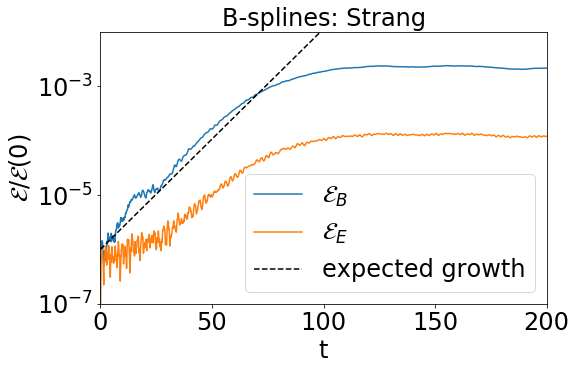

In [48]:
f1 = plt.figure()
f1.set_figheight(5)
f1.set_figwidth(8)

fontsize = 24
#plt.rc('text', usetex = False)
#plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

Nt = len(en_B) - 1
tn = np.linspace(0, Nt*dt, Nt + 1)

plt.semilogy(tn, en_B/en_tot[0], label = '$\mathcal{E}_B$')
plt.semilogy(tn, en_E/en_tot[0], label = '$\mathcal{E}_E$')
plt.ylim((1e-7, 1e-2))
plt.xlim((0, 200))

omega = utils.solveDispersionHybrid(k, +1, c, wce, wpe, wpar, wperp, nuh, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

t2 = np.linspace(0, 150, 100) 
plt.semilogy(t2, 1e-6*np.exp(gamma*2*t2), 'k--', label = 'expected growth')
plt.xlabel('t')
plt.ylabel('$\mathcal{E}/\mathcal{E}(0)$')
plt.legend()

plt.title('B-splines: Strang', fontsize = fontsize)
plt.savefig('Bsplines_Strang.pdf', bbox_inches = 'tight')
# ...

## 3. 2 Evolution of energy conservation error

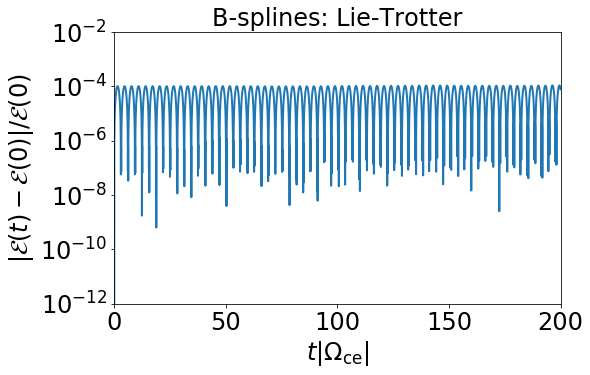

In [41]:
# ... plot error in energy conservation
f2 = plt.figure()
f2.set_figheight(5)
f2.set_figwidth(8)

fontsize = 24
#plt.rc('text', usetex = False)
#plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

Nt = len(en_B) - 1
tn = np.linspace(0, Nt*dt, Nt + 1)

plt.semilogy(tn, np.abs(en_tot - en_tot[0])/en_tot[0], linewidth = 2)
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-2))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.title('Relative error in total energy', fontsize = fontsize)

plt.title('B-splines: Lie-Trotter', fontsize = fontsize)
plt.savefig('Bsplines_Lie_error.pdf', bbox_inches = 'tight')
# ...

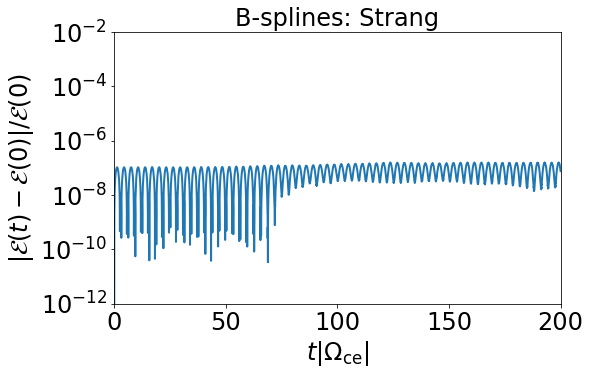

In [49]:
# ... plot error in energy conservation
f2 = plt.figure()
f2.set_figheight(5)
f2.set_figwidth(8)

fontsize = 24
#plt.rc('text', usetex = False)
#plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

Nt = len(en_B) - 1
tn = np.linspace(0, Nt*dt, Nt + 1)

plt.semilogy(tn, np.abs(en_tot - en_tot[0])/en_tot[0], linewidth = 2)
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-2))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
plt.title('Relative error in total energy', fontsize = fontsize)

plt.title('B-splines: Strang', fontsize = fontsize)
plt.savefig('Bsplines_Strang_error.pdf', bbox_inches = 'tight')
# ...

## 3. 3 Fourier spectrum in space and time

In [2]:
data = np.loadtxt('data_wpe=2_wpar=0.1_wperp_0.1_nuh=0.002_L=80_Nel=512_T=300_dt=0.05_p=3_Np=5e4_CVoff_Strang_GEMPIC.txt')

In [7]:
en_B = data[:, -4]
en_E = data[:, -3]
en_C = data[:, -2]
en_H = data[:, -1]
en_tot = en_B + en_E + en_C + en_H

bx_save = data[:, :-4]

wpe = 2.
wpar = 0.1
wperp = 0.1
nuh = 0.002
Lz = 80.
Nel = 512
T = 300.
dt = 0.05
p = 3
Np = int(5e4)
Nt = int(T/dt)

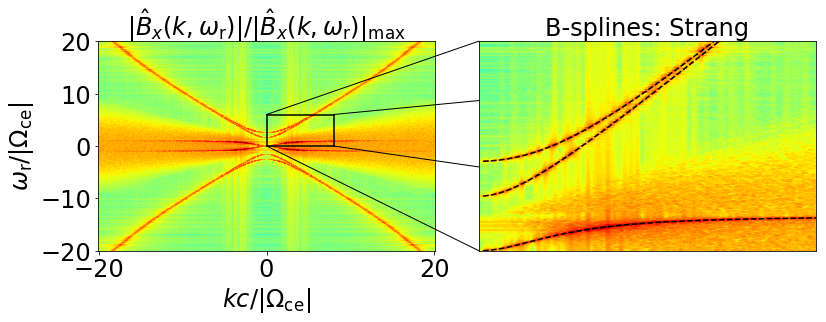

In [10]:
from matplotlib.colors import LogNorm
from matplotlib.patches import ConnectionPatch

f3 = plt.figure()
f3.set_figheight(5)
f3.set_figwidth(12)

fontsize = 24
#plt.rc('text', usetex = False)
#plt.rc('font', family = 'serif')
plt.rcParams.update({'font.size': fontsize})
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

ks = np.linspace(0, Nel, Nel + 1) - Nel/2
ks = 2*np.pi/Lz*ks

Bxkw = np.fft.fft2(bx_save)
K, W = np.meshgrid(ks, w)
Bkw = np.fft.fftshift(Bxkw)
Bkw_plot = np.abs(Bkw)



ax1 = plt.subplot(121)

ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.plot(np.linspace(0, 8, 10), np.zeros(10), 'k')
plt.plot(np.linspace(0, 8, 10), np.ones(10)*6, 'k')
plt.plot(np.zeros(10), np.linspace(0, 6, 10), 'k')
plt.plot(np.ones(10)*8, np.linspace(0, 6, 10), 'k')
plt.ylim((-20, 20))
plt.xlabel(r'$kc/ |\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\omega_\mathrm{r}/ |\Omega_\mathrm{ce}|$')
plt.title(r'$|\hat{B}_x(k,\omega_\mathrm{r})|/|\hat{B}_x(k,\omega_\mathrm{r})|_\mathrm{max}$', fontsize = fontsize)




# ... analytical dispersion relation
k1 = np.linspace(0.1, 8.0, 40)

w1_1 = np.zeros(40)
w1_2 = np.zeros(40)
w1_3 = np.zeros(40)

w1_1[0] = 0.0001 
w1_2[0] = 1.5001 
w1_3[0] = 2.5001


for i in range(0, 40):
    
    if i == 0:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i], 1e-6, 100)[0]
    
    else:
        w1_1[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_1[i-1], 1e-6, 100)[0]
        w1_2[i] = utils.solveDispersionCold(k1[i], -1, c, wce, wpe, w1_2[i-1], 1e-6, 100)[0]
        w1_3[i] = utils.solveDispersionCold(k1[i], +1, c, wce, wpe, w1_3[i-1], 1e-6, 100)[0]
# ...    

    
    
ax2 = plt.subplot(122)   

ticks = np.power(10, np.linspace(-8, 0, 5))
lvls = np.logspace(-8, 0, 60)
plt.contourf(K, W, Bkw_plot/Bkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels = lvls)
plt.xlim((0, 8))
plt.ylim((0, 6))
plt.xticks([], [])
plt.yticks([], [])
plt.plot(k1, w1_1, 'k--')
plt.plot(k1, w1_2, 'k--')
plt.plot(k1, w1_3, 'k--')
plt.subplots_adjust(hspace = 0.3)
plt.tight_layout()


con1 = ConnectionPatch(xyA = (0, 6), xyB = (0, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con2 = ConnectionPatch(xyA = (0, 0), xyB = (0, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con3 = ConnectionPatch(xyA = (0, 4.3), xyB = (8, 6), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)
con4 = ConnectionPatch(xyA = (0, 2.4), xyB = (8, 0), coordsA = "data", coordsB = "data", axesA = ax2, axesB = ax1, color = "black", linewidth = 1)

ax2.add_artist(con1)
ax2.add_artist(con2)
ax2.add_artist(con3)
ax2.add_artist(con4)

plt.title('B-splines: Strang', fontsize = fontsize)
plt.savefig('Bsplines_Strang_spectrum.png', bbox_inches = 'tight')

## 3. 4 Final distribution functions

Text(0.5,1,'Difference perpendicular')

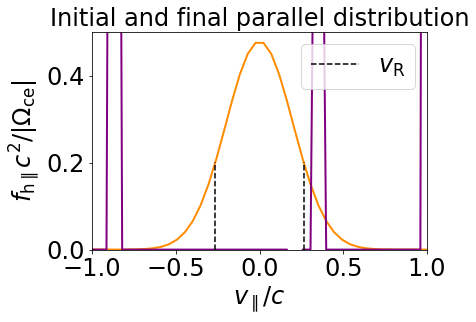

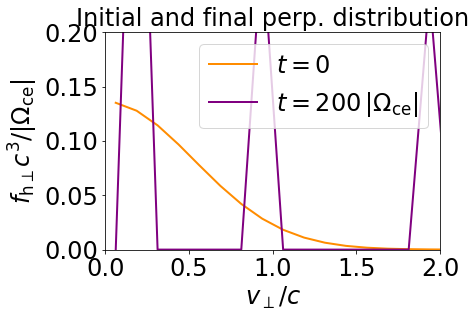

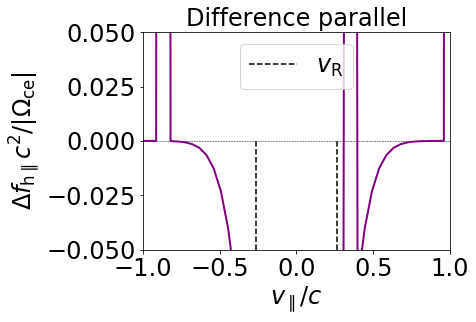

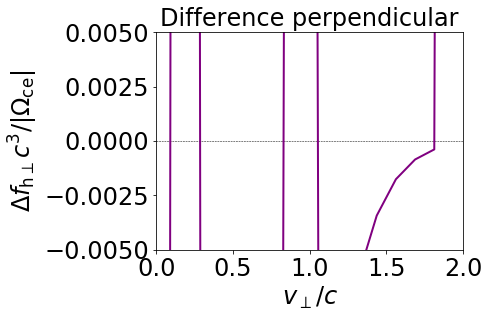

In [9]:
fontsize = 24
plt.rcParams.update({'font.size': fontsize})
#plt.rc('text', usetex = True)
#plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)




# ... discretization of velocity space in parallel and perpendicular direction
Nbin_par = 128
Nbin_perp = 32

Lv_par = 6
Lv_perp = 4

dv_bin_par = Lv_par/Nbin_par
v_bin_par = np.linspace(-Lv_par/2, Lv_par/2, Nbin_par + 1)
v_bin_par = np.delete(v_bin_par, -1) + dv_bin_par/2
Vedges_par = np.linspace(-Lv_par/2, Lv_par/2, Nbin_par + 1)
binVol_par = dv_bin_par

dv_bin_perp = Lv_perp/Nbin_perp
v_bin_perp = np.linspace(0, Lv_perp, Nbin_perp + 1)
v_bin_perp = np.delete(v_bin_perp, -1) + dv_bin_perp/2
Vedges_perp = np.linspace(0, Lv_perp, Nbin_perp + 1)
binVol_perp = dv_bin_perp
# ...


# ... initial (analytical) distributions
f_par_ini = fh0(0, 0, 0, v_bin_par, 0)*2*np.pi*wperp**2
f_perp_ini = fh0(0, v_bin_perp/np.sqrt(2), v_bin_perp/np.sqrt(2), 0, 0)*np.sqrt(2*np.pi)*wpar
# ...



# ... final (numerical) distributions
Vbin_par = np.digitize(particles[:, 3], Vedges_par) - 1
Vbin_perp = np.digitize(np.sqrt(particles[:, 1]**2 + particles[:, 2]**2), Vedges_perp) - 1

f_par = np.bincount(Vbin_par, particles[:, 4], Nbin_par)/(binVol_par*Lz) + control*f_par_ini
f_perp = np.bincount(Vbin_perp, particles[:, 4], Nbin_perp)/(binVol_perp*Lz*v_bin_perp*2*np.pi) + control*f_perp_ini
# ...



# ... compute resonant velocities
omega = utils.solveDispersionHybrid(k, +1, c, wce, wpe, wpar, wperp, nuh, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)
vR = np.abs((omega_r + wce)/k)
# ...



f4 = plt.figure()
f4.set_figheight(4)
f4.set_figwidth(6)


plt.plot(v_bin_par, f_par_ini, linewidth = 2, color = 'darkorange')
plt.plot(v_bin_par, f_par, linewidth = 2, color = 'purple')
plt.plot(np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', label = '$v_\mathrm{R}$')
plt.plot(-np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--')
plt.ylim((0, 0.5))
plt.xlim((-1, 1))
plt.xlabel('$v_\parallel/c$')
plt.ylabel('$f_{\mathrm{h}\parallel}c^2/|\Omega_\mathrm{ce}|$')
plt.title('Initial and final parallel distribution', fontsize = fontsize)
plt.legend()



f5 = plt.figure()
f5.set_figheight(4)
f5.set_figwidth(6)

plt.plot(v_bin_perp, f_perp_ini, label = '$t=0$', linewidth = 2, color = 'darkorange')
plt.plot(v_bin_perp, f_perp, label = '$t=200\,|\Omega_\mathrm{ce}|$', linewidth = 2, color = 'purple')
plt.xlabel('$v_\perp/c$')
plt.ylabel('$f_{\mathrm{h}\perp}c^3/|\Omega_\mathrm{ce}|$')
plt.ylim((0, 0.2))
plt.xlim((0, 2))
plt.title('Initial and final perp. distribution', fontsize = fontsize)
plt.legend()




f6 = plt.figure()
f6.set_figheight(4)
f6.set_figwidth(5.5)

plt.plot(-2, 0, linewidth = 2)
plt.plot(np.linspace(-1, 1, 10), np.zeros(10), 'k--', linewidth = 0.5)
plt.plot(v_bin_par, f_par - f_par_ini, linewidth = 2, color = 'purple')
plt.plot(np.ones(10)*vR, np.linspace(-0.05, 0, 10), 'k--', label = '$v_\mathrm{R}$')
plt.plot(-np.ones(10)*vR, np.linspace(-0.05, 0, 10), 'k--')
plt.legend(loc = 'upper center')

plt.xlim((-1, 1))
plt.ylim((-0.05, 0.05))
plt.xlabel('$v_\parallel/c$')
plt.ylabel('$\Delta f_{\mathrm{h}\parallel}c^2/|\Omega_\mathrm{ce}|$')
plt.title('Difference parallel', fontsize = fontsize)



f7 = plt.figure()
f7.set_figheight(4)
f7.set_figwidth(5.5)

plt.plot(-2, 0, linewidth = 2)
plt.plot(np.linspace(0, 2, 10), np.zeros(10), 'k--', linewidth = 0.5)
plt.plot(v_bin_perp, f_perp - f_perp_ini, linewidth = 2, color = 'purple')
plt.xlim((0, 2))
plt.ylim((-0.005, 0.005))
plt.xlabel('$v_\perp/c$')
plt.ylabel('$\Delta f_{\mathrm{h}\perp}c^3/|\Omega_\mathrm{ce}|$')
plt.title('Difference perpendicular', fontsize = fontsize)